# Importowanie bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Implementacja sieci Kohonena

In [2]:
class KohonenNetwork:
    def __init__(self, input_size, output_size, initial_learning_rate=0.1, initial_radius=1.0):
        self.input_size = input_size
        self.output_size = output_size
        self.initial_learning_rate = initial_learning_rate
        self.learning_rate = initial_learning_rate
        self.initial_radius = initial_radius
        self.weights = np.random.rand(output_size, input_size)

    def train(self, data, epochs=100):
        for epoch in range(epochs):
            for input_vector in data:
                winner_index = self._find_winner(input_vector)
                self._update_weights(input_vector, winner_index, epoch)

    def _find_winner(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=1)
        return np.argmin(distances)

    def _update_weights(self, input_vector, winner_index, epoch):
        # Promień sąsiedztwa maleje w czasie
        radius = self.initial_radius * np.exp(-epoch / 50.0)  
   
        distance_to_winner = np.abs(np.arange(self.output_size) - winner_index)
        
        # Funkcja sąsiedztwa Gaussowskiego
        neighborhood_function = np.exp(-(distance_to_winner ** 2) / (2 * radius ** 2))

        # Zmiana learning_rate w czasie
        self.learning_rate = self.initial_learning_rate * np.exp(-epoch / 50.0)

        # Aktualizacja wag dla zwycięskiego neuronu i sąsiedztwa
        delta_weights = self.learning_rate * neighborhood_function[:, np.newaxis] * (input_vector - self.weights)
        self.weights += delta_weights
        
    def predict(self, data):
        winners = [self._find_winner(input_vector) for input_vector in data]
        return winners

# Wczytywanie danych Iris

In [3]:
iris = datasets.load_iris()
data = iris.data
target = iris.target

# Standaryzacja danych

In [4]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Tworzenie sieci Kohonena

In [5]:
input_size = data.shape[1]
output_size = 3 # Liczba neuronów może być dowolna
learning_rate = 0.1
kohonen_network = KohonenNetwork(input_size, output_size, learning_rate)

# Trenowanie i wizualizacja sieci na nieprzetworzonych danych Iris

In [6]:
def visualize_kohonen(network, data, target):
    winners = network.predict(data)

    plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis', edgecolor='k', s=50, label='Data points')
    plt.scatter(network.weights[:, 0], network.weights[:, 1], marker='o', edgecolors='w', s=200, linewidths=2, c='r', label='Neuron centers')
    plt.title('Kohonen Network Visualization with Iris Data')
    plt.legend()
    plt.show()

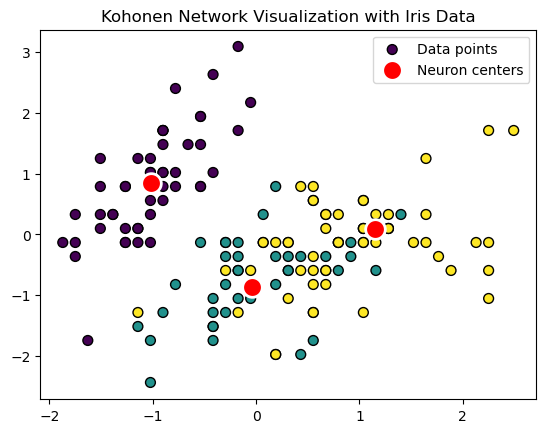

In [7]:
kohonen_network.train(data, epochs=100)

visualize_kohonen(kohonen_network, data, target)

# Projekcja danych Iris

In [8]:
import pandas as pd
df = pd.DataFrame(iris.data)
df['target'] = iris.target

def project_data(df):

    covariance_matrix = df.cov()
    values, vectors = np.linalg.eig(covariance_matrix)
    top_vectors = vectors[:, :2]
    projected = df.dot(top_vectors)
    return projected
    
X_0 = df[df['target'] == 0].drop(columns = ['target'])
X_1 = df[df['target'] == 1].drop(columns = ['target'])
X_2 = df[df['target'] == 2].drop(columns = ['target'])

X_0 = project_data(X_0)
X_1 = project_data(X_1)
X_2 = project_data(X_2)

X = pd.concat([X_0, X_1, X_2])

# Trenowanie i wizualizacja sieci na projekcji danych Iris

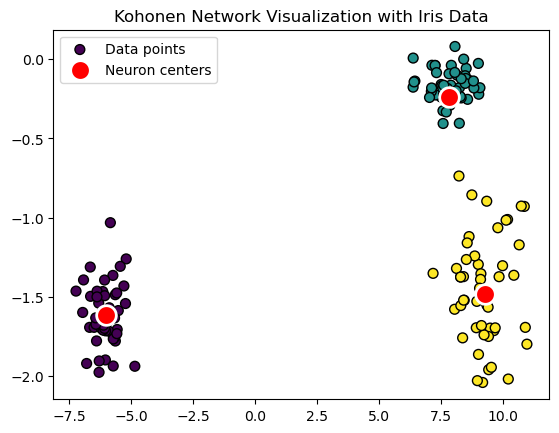

In [9]:
data_projected = np.array(X)

input_size = data_projected.shape[1]
output_size = 3 # Liczba neuronów może być dowolna
learning_rate = 0.1
kohonen_network = KohonenNetwork(input_size, output_size, learning_rate)



kohonen_network.train(data_projected, epochs=100)

visualize_kohonen(kohonen_network, data_projected, target)